In [93]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
path = os.path.join("..","WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df = pd.read_csv(path)

In [95]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We want to see how many categorical non-integer features we have

In [7]:
df.select_dtypes([object]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
df.select_dtypes([object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [9]:
for i in df.select_dtypes([object]).columns:
    print(i,":",df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


Attrition is the label. Convert to binary variable [1,0]

BusinessTravel will be one hot encoded.

Department will be onehot encoded as there are only 3 values. Perhaps we can create separate models for each department as each one would have a difference in work culture that cannot be easily modeled in a joint model.

EducationField will likely play a huge factor in the attrition rate especially when paired with department and jobrole.

Gender only has 2 values so we can convert to a binary variable [1,0]. We may not be able to include it if it is legally protected from antidiscrimination laws. It could be used for output analysis for other problems.

JobRole is a complex one as onehot encoding can easily lead to the curse of dimensionality.

MaritalStatus will need to be onehot encoded, but we may not be able to include that if it is protected information.

The Over18 column only seems to have 1 value. This will be a candidate for removal.

Overtime can be set to a binary variable [1,0]

The variable of interest is Attrition. Let's look at the class distribution

In [10]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

The values are quite imbalanced. The approaches we can take are classification, outlier detection, clustering for similarity.

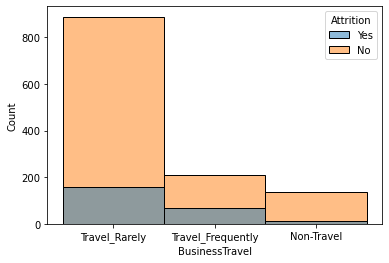

In [12]:
sns.histplot(data=df,x="BusinessTravel",hue="Attrition")
plt.show()

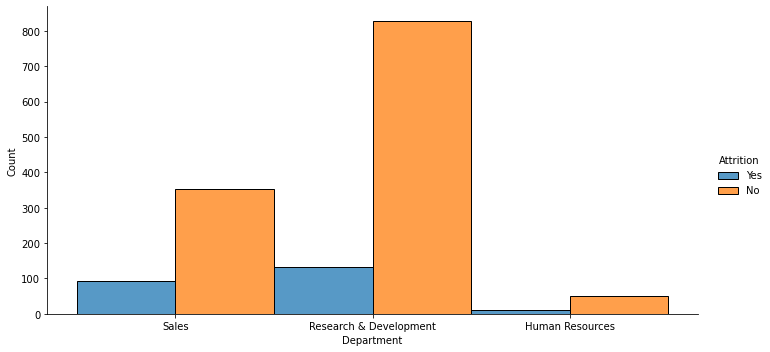

In [45]:
sns.displot(df,x="Department",hue="Attrition",multiple="dodge",height=5,aspect=2)
plt.show()

In [91]:
df[["Department","Attrition"]].groupby(["Department","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum())

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
dtype: float64

HR and sales have a similar attrition rate, while R&D is considerably lower.

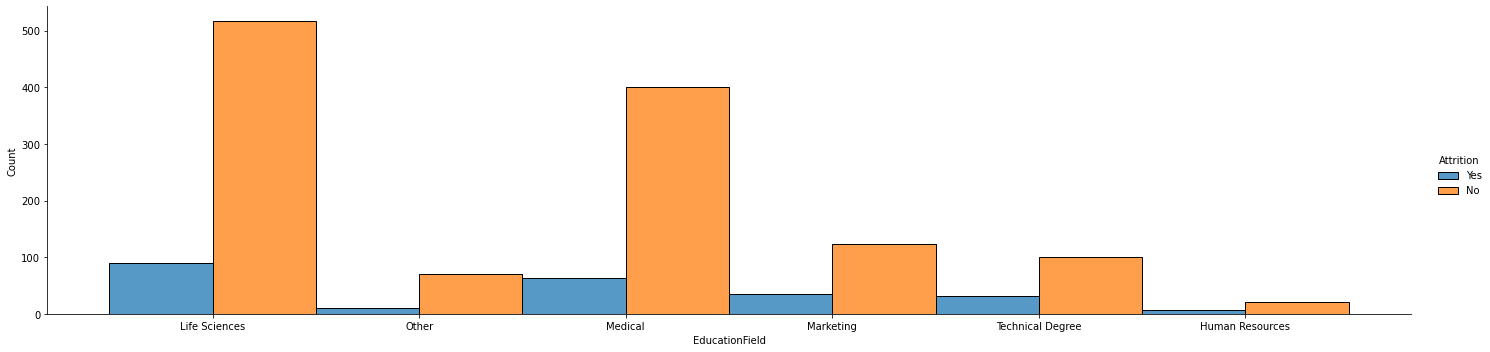

In [39]:
sns.displot(df,x="EducationField",hue="Attrition",multiple="dodge",height=5,aspect=4)
plt.show()

In [92]:
df[["EducationField","Attrition"]].groupby(["EducationField","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum())

EducationField    Attrition
Human Resources   No           0.740741
                  Yes          0.259259
Life Sciences     No           0.853135
                  Yes          0.146865
Marketing         No           0.779874
                  Yes          0.220126
Medical           No           0.864224
                  Yes          0.135776
Other             No           0.865854
                  Yes          0.134146
Technical Degree  No           0.757576
                  Yes          0.242424
dtype: float64

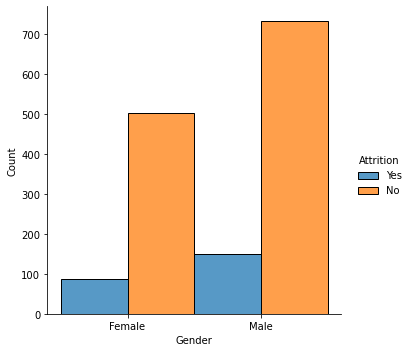

In [37]:
sns.displot(df,x="Gender",hue="Attrition",multiple="dodge")
plt.show()

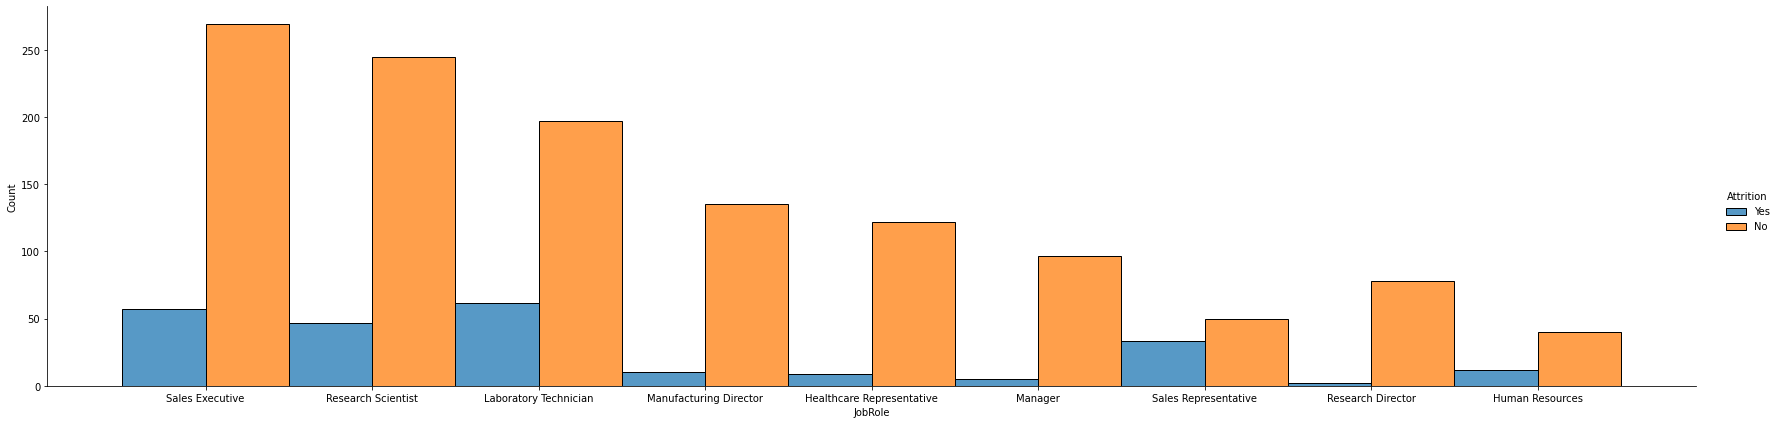

In [35]:
sns.displot(df,x="JobRole",hue="Attrition",multiple="dodge",height=6,aspect=4)
plt.show()

Sales reps have the largest attrition rate. Whereas research director has the lowest.

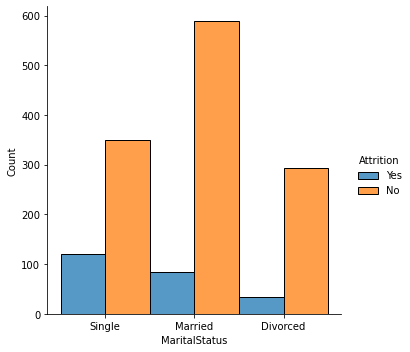

In [40]:
sns.displot(df,x="MaritalStatus",hue="Attrition",multiple="dodge")
plt.show()

Looks like single workers have the highest probability of attrition. Could be because of difference in goals between categories. 

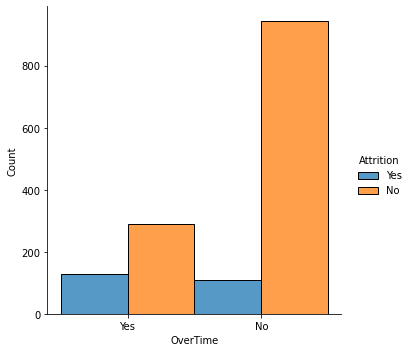

In [42]:
sns.displot(df,x="OverTime",hue="Attrition",multiple="dodge")
plt.show()

In [96]:
df[["OverTime","Attrition"]].groupby(["OverTime","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum())

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
dtype: float64

Clearly Overtime is a huge factor in attrition.